## ⚡️ Energy Transition and Efficiency Trends in Egypt (2000–2022)

This analysis highlights Egypt’s progress in energy access and efficiency, while revealing areas where policy intervention, investment in renewables, and regional cooperation could enhance sustainability and resilience in the energy sector.

## 1. Data Manipulation & Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\youss\OneDrive\Desktop\Energy\World Energy Consumption.csv")

In [3]:
egypt = data.copy()

In [4]:
egypt = egypt[egypt['country'] == 'Egypt']

In [5]:
egypt['year'].info()

<class 'pandas.core.series.Series'>
Index: 123 entries, 5964 to 6086
Series name: year
Non-Null Count  Dtype
--------------  -----
123 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


In [6]:
egypt = egypt[egypt['year'] >= 2000]

In [7]:
egypt.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
6064,Egypt,2000,EGY,71371368.0,4.439409e+11,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,570.833,0.203,0.238,1.962,0.14,3.335,0.188,0.042
6065,Egypt,2001,EGY,72854256.0,4.751627e+11,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,122.360,0.288,0.526,3.020,0.22,7.218,0.277,0.089
6066,Egypt,2002,EGY,74393760.0,5.011863e+11,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,18.715,0.094,0.620,2.688,0.20,8.337,0.236,0.102
6067,Egypt,2003,EGY,75963328.0,5.279633e+11,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,34.588,0.209,0.829,4.871,0.37,10.919,0.409,0.128
6068,Egypt,2004,EGY,77522424.0,5.608132e+11,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,76.241,0.623,1.452,6.708,0.52,18.736,0.540,0.213


In [8]:
egypt.isna().sum().head(20)

country                     0
year                        0
iso_code                    0
population                  0
gdp                         4
biofuel_cons_change_pct    23
biofuel_cons_change_twh    23
biofuel_cons_per_capita    23
biofuel_consumption        23
biofuel_elec_per_capita     0
biofuel_electricity         0
biofuel_share_elec          0
biofuel_share_energy       23
carbon_intensity_elec       0
coal_cons_change_pct        0
coal_cons_change_twh        0
coal_cons_per_capita        0
coal_consumption            0
coal_elec_per_capita        0
coal_electricity            0
dtype: int64

In [9]:
egypt.isna().sum().tail(20)

renewables_electricity          0
renewables_energy_per_capita    0
renewables_share_elec           0
renewables_share_energy         0
solar_cons_change_pct           1
solar_cons_change_twh           0
solar_consumption               0
solar_elec_per_capita           0
solar_electricity               0
solar_energy_per_capita         0
solar_share_elec                0
solar_share_energy              0
wind_cons_change_pct            0
wind_cons_change_twh            0
wind_consumption                0
wind_elec_per_capita            0
wind_electricity                0
wind_energy_per_capita          0
wind_share_elec                 0
wind_share_energy               0
dtype: int64

In [10]:
egypt['gdp'].isna()

6064    False
6065    False
6066    False
6067    False
6068    False
6069    False
6070    False
6071    False
6072    False
6073    False
6074    False
6075    False
6076    False
6077    False
6078    False
6079    False
6080    False
6081    False
6082    False
6083     True
6084     True
6085     True
6086     True
Name: gdp, dtype: bool

In [11]:
new_gdp_values = [99838543960.08, 96684636118.60, 85146067415.73, 80288461538.46, 78782467532.47,
    89600665557.40, 107426086956.52, 130437828371.28, 162818181818.18, 189147005444.65,
    218983666061.71, 235989672977.63, 279116666666.67, 288434108527.13, 305595408895.27,
    329366576819.41, 332441717791.41, 248362771739.13, 262588632526.73, 318678815489.75,
    383817841547.10, 424671765455.70, 476747720364.74]

years = list(range(2000, 2023))

gdp_map = dict(zip(years, new_gdp_values))

egypt['gdp'] = egypt['year'].map(gdp_map)

In [12]:
egypt.describe()

,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,23.00000,2.300000e+01,2.300000e+01,0.0,0.0,0.0,0.0,23.0,23.0,23.0,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2011.00000,9.027878e+07,2.271724e+11,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.501783,0.201783,49.090130,0.581522,4.887130,17.184261,1.692609,49.227174,0.988348,0.500565
std,6.78233,1.253631e+07,1.197340e+11,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.890464,0.409235,119.107462,1.325993,4.524162,12.380040,1.397476,40.299939,0.624872,0.413879
min,2000.00000,7.137137e+07,7.878247e+10,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.000000,0.000000,-34.788000,-1.512000,0.238000,1.962000,0.140000,3.335000,0.188000,0.042000
25%,2005.50000,7.985249e+07,1.036323e+11,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.000000,0.000000,3.951500,0.122500,1.591500,7.322000,0.585000,20.044000,0.553000,0.223500
50%,2011.00000,8.920006e+07,2.359897e+11,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.091000,0.008000,18.613000,0.284000,3.664000,14.243000,1.330000,40.155000,0.821000,0.376000
75%,2016.50000,1.007867e+08,3.121371e+11,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.305500,0.139500,40.986000,0.686500,6.015000,22.469000,2.265000,59.727000,1.172500,0.576500
max,2022.00000,1.109901e+08,4.767477e+11,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,2.427000,1.261000,570.833000,5.223000,14.079000,40.050000,4.230000,128.853000,2.235000,1.397000


## 2. Exploratory Data Analysis

<Figure size 1100x700 with 0 Axes>

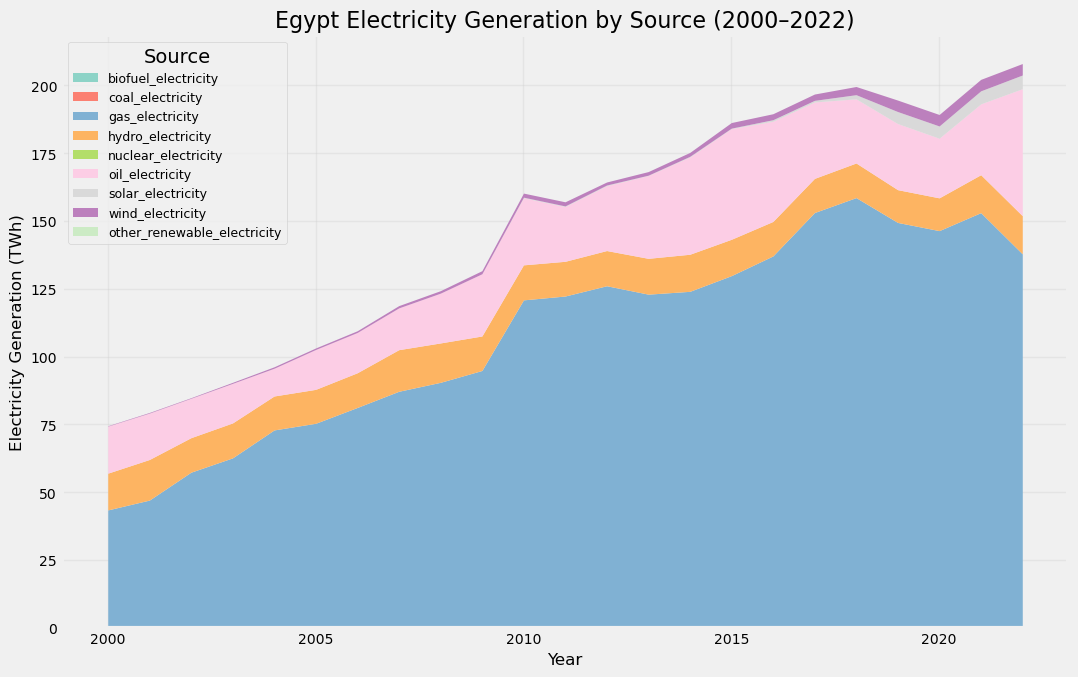

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11, 7))

colors = ['#8dd3c7', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5']
columns = ['year', 'biofuel_electricity', 'coal_electricity', 'gas_electricity',
           'hydro_electricity', 'nuclear_electricity', 'oil_electricity',
           'solar_electricity', 'wind_electricity', 'other_renewable_electricity']

elec_mix = egypt[columns].set_index('year')
elec_mix.plot.area(stacked=True, figsize=(11, 7), color=colors, linewidth=0)

plt.title('Egypt Electricity Generation by Source (2000–2022)', fontsize=16)
plt.ylabel('Electricity Generation (TWh)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper left', title='Source', fontsize=9)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

- Gas dominates the electricity mix throughout the entire period, consistently accounting for the largest share of generation. It has expanded significantly from ~45 TWh in 2000 to over 140 TWh at its peak around 2019.

- Oil-fired electricity played a notable role until around 2010, after which its contribution declined — possibly due to rising gas availability, efficiency improvements, or fuel switching policies.

- Coal and nuclear generation are negligible to non-existent, indicating Egypt has not relied on these sources for electricity during this period.

- Hydro power remained relatively stable over the years, with only small fluctuations — this aligns with the limited capacity expansion potential of Egypt’s hydro resources (mostly the Aswan High Dam).

- Renewables (solar, wind, and others) begin to emerge visibly only after 2015, with a notable uptick in solar and wind post-2018, suggesting the impact of national projects like the Benban Solar Park and wind projects in the Red Sea region.

- Recent years (2020–2022) show a modest rise in renewables, but their overall contribution remains small compared to gas.

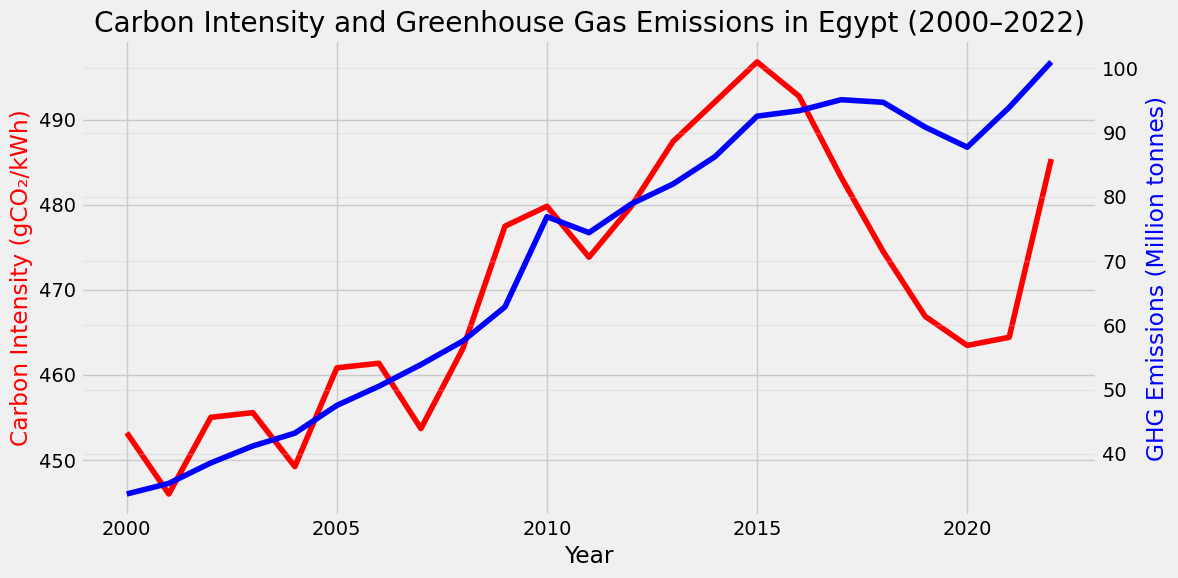

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(egypt['year'], egypt['carbon_intensity_elec'], color='red', label='Carbon Intensity (gCO₂/kWh)')
ax1.set_ylabel('Carbon Intensity (gCO₂/kWh)', color='red')
ax1.set_xlabel('Year')

ax2 = ax1.twinx()
ax2.plot(egypt['year'], egypt['greenhouse_gas_emissions'], color='blue', label='GHG Emissions')
ax2.set_ylabel('GHG Emissions (Million tonnes)', color='blue')

plt.title('Carbon Intensity and Greenhouse Gas Emissions in Egypt (2000–2022)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Although Egypt's electricity became less carbon-intensive after 2015 — likely due to renewable investments or efficiency gains — total GHG emissions still rose, possibly due to economic or population growth.

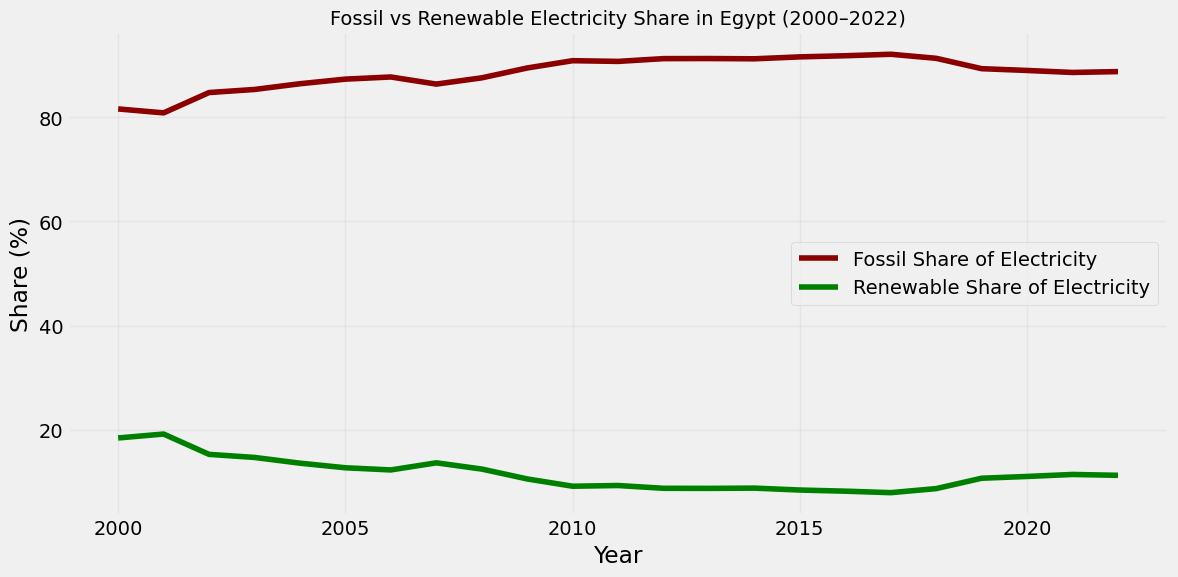

In [15]:
egypt['renewables_share_elec'] = 100 - egypt['fossil_share_elec']

plt.figure(figsize=(12, 6))
plt.plot(egypt['year'], egypt['fossil_share_elec'], label='Fossil Share of Electricity', color='darkred')
plt.plot(egypt['year'], egypt['renewables_share_elec'], label='Renewable Share of Electricity', color='green')
plt.title('Fossil vs Renewable Electricity Share in Egypt (2000–2022)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Share (%)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Egypt's renewable growth has started to recover post-2018, likely due to national projects like the Benban Solar Park. However, fossil fuels still dominate, which shows a strong dependency — and an opportunity for strategic diversification.

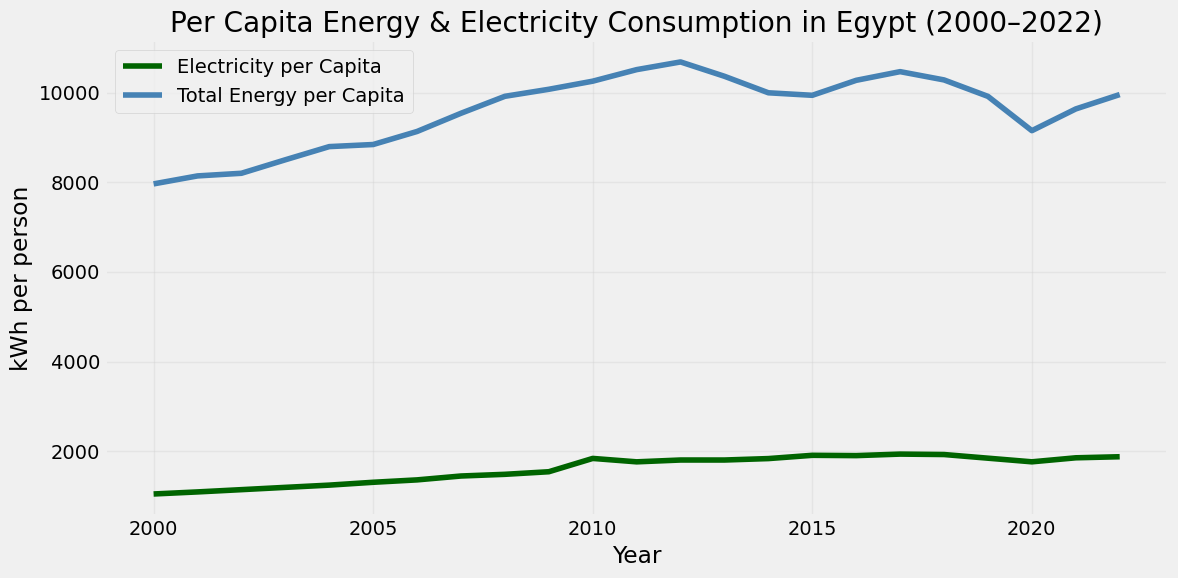

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(egypt['year'], egypt['per_capita_electricity'], label='Electricity per Capita', color='darkgreen')
plt.plot(egypt['year'], egypt['energy_per_capita'], label='Total Energy per Capita', color='steelblue')
plt.title('Per Capita Energy & Electricity Consumption in Egypt (2000–2022)')
plt.xlabel('Year')
plt.ylabel('kWh per person')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- Per capita electricity use has grown steadily and plateaued around ~2000 kWh/person.

- Total energy per capita is much higher, reflecting Egypt’s reliance on non-electric energy use (e.g., gas for transport/industry).

- A slight dip around 2019–2021 may relate to COVID or macroeconomic factors.


Egypt has seen consistent growth in per capita electricity access, a sign of infrastructure improvement. However, total energy consumption remains high, emphasizing the need for efficiency improvements and decarbonization beyond just the power sector.

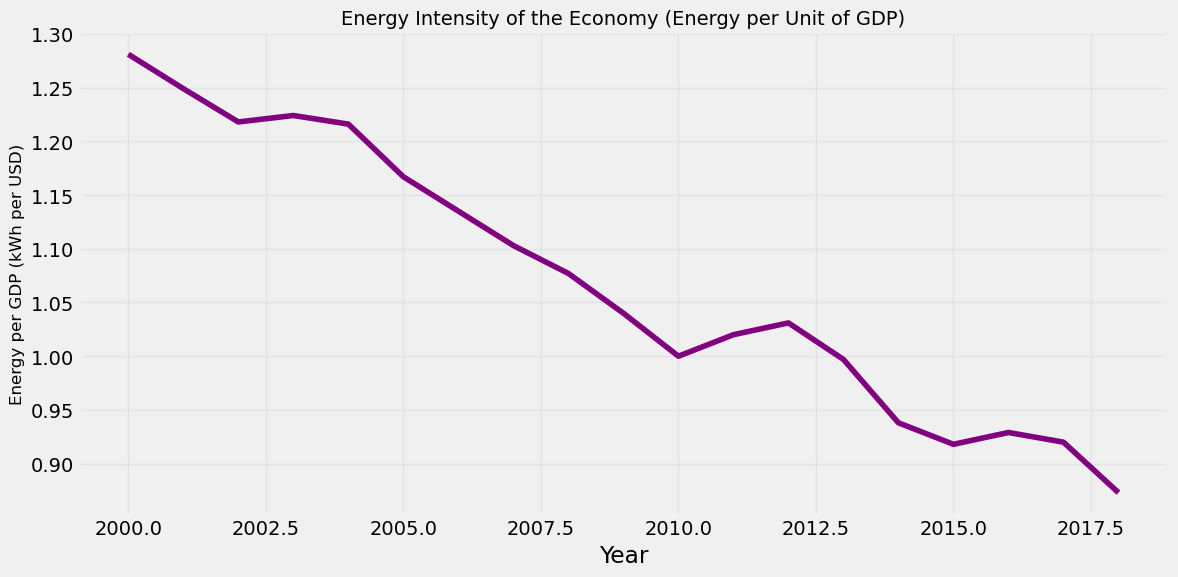

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(egypt['year'], egypt['energy_per_gdp'], color='purple')
plt.title('Energy Intensity of the Economy (Energy per Unit of GDP)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Energy per GDP (kWh per USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Egypt’s energy intensity has been steadily declining — from ~1.28 kWh/USD in 2000 to ~0.87 kWh/USD in 2018. This means the economy has become more energy efficient, producing more value with less energy input. This trend aligns with industrial upgrades, diversification of energy use, and possibly improved efficiency policies.

**Key Insights:**
- Gas and oil dominate electricity generation, but solar and wind have started to gain traction post-2018.

- Carbon intensity of electricity dropped after 2015, showing cleaner generation.

- Despite that, GHG emissions increased, suggesting total energy demand is rising.

- Renewables’ share of electricity remains low (~10–12%) — there’s potential for growth.

- Energy intensity (kWh/USD) declined steadily, indicating improved energy efficiency in the economy.

## 3. Explanatory Data Analysis

## Correlation Analysis: Energy, Emissions, and Economic Indicators

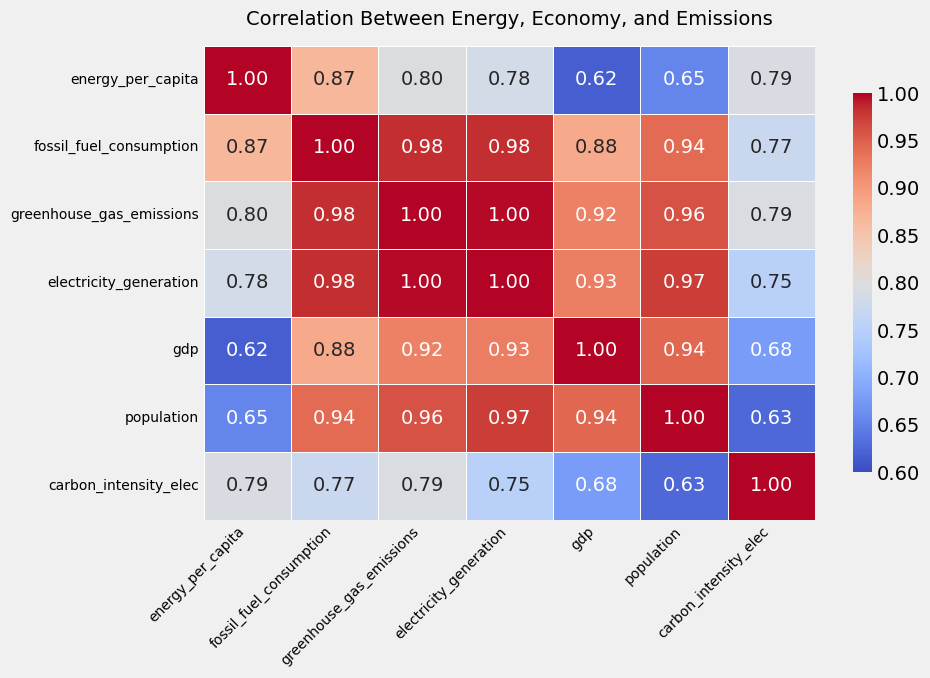

In [18]:
cols = ['energy_per_capita', 'fossil_fuel_consumption', 'greenhouse_gas_emissions',
        'electricity_generation', 'gdp', 'population', 'carbon_intensity_elec']

corr = egypt[cols].corr()

plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(corr,annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.5,vmin=0.6,vmax=1.0,cbar_kws={"shrink": 0.8})

plt.title('Correlation Between Energy, Economy, and Emissions', fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

To better understand the relationships between key energy, economic, and environmental variables, a correlation heatmap was created using historical data for Egypt (2000–2022).

The variables include:
- **Energy consumption per capita**
- **Fossil fuel consumption**
- **Greenhouse gas emissions**
- **Electricity generation**
- **GDP**
- **Population**
- **Carbon intensity of electricity**

This matrix helps explore how strongly these features are associated and identify potential drivers of emissions or energy demand trends.

**Initial Observations:**

- **Fossil fuel consumption** is highly correlated with both **electricity generation (0.98)** and **GHG emissions (0.98)** — indicating Egypt’s continued reliance on fossil fuels for electricity.
- **Electricity generation** is strongly linked to **GDP (0.93)** and **population (0.97)**, which suggests energy demand grows alongside economic and demographic development.
- **Carbon intensity of electricity** shows a moderately strong correlation with **energy per capita (0.79)** and **fossil fuel consumption (0.77)**, reflecting that more energy use does not necessarily come from clean sources.
- **GHG emissions** also strongly correlate with **GDP (0.92)** and **population (0.96)**, emphasizing that both economic expansion and population growth play a role in emissions trends.

These correlations reveal the central role of fossil fuels in driving emissions and highlight the challenges Egypt faces in decarbonizing without slowing development.

**Exploratory Insight:**

The correlation matrix raises questions around energy efficiency and decarbonization strategies. As Egypt continues to grow economically and demographically, the high dependency on fossil fuels could drive emissions further unless cleaner sources gain a larger share of electricity generation.

## Year-over-Year Growth Trends: Fossil vs Renewable Energy Consumption

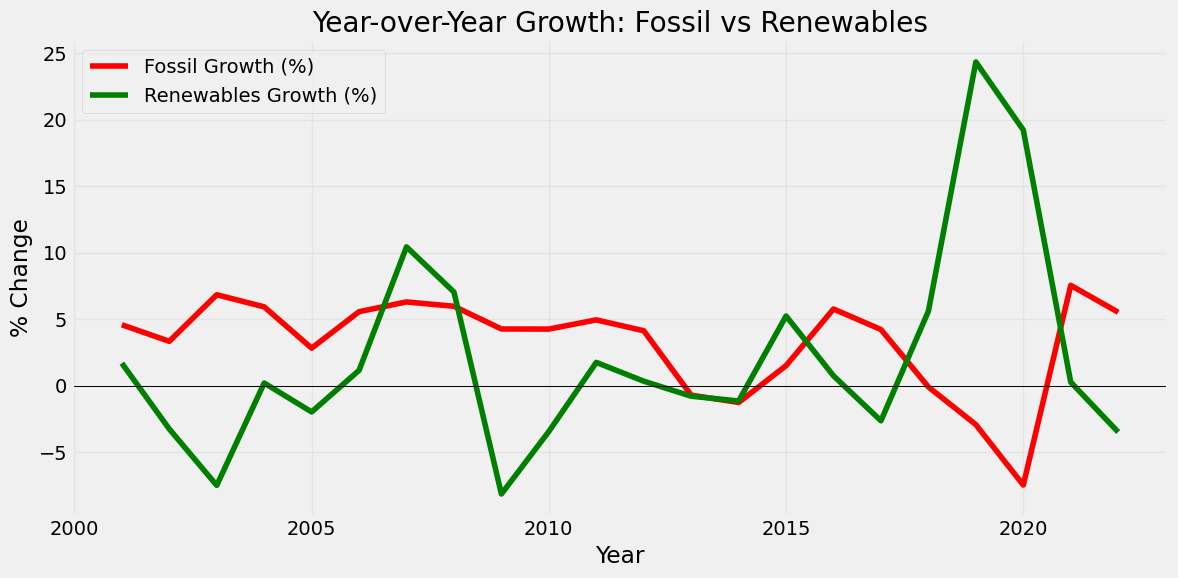

In [19]:
egypt['fossil_growth_pct'] = egypt['fossil_fuel_consumption'].pct_change() * 100
egypt['renewables_growth_pct'] = egypt['renewables_consumption'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(egypt['year'], egypt['fossil_growth_pct'], label='Fossil Growth (%)', color='red')
plt.plot(egypt['year'], egypt['renewables_growth_pct'], label='Renewables Growth (%)', color='green')
plt.axhline(0, color='black', linewidth=0.7)
plt.title('Year-over-Year Growth: Fossil vs Renewables')
plt.ylabel('% Change')
plt.xlabel('Year')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

To explore the dynamics of energy transition in Egypt, this chart compares the **year-over-year percentage change** in fossil fuel consumption and renewable energy consumption from 2000 to 2022.

This approach highlights periods of rapid expansion, slowdown, or even contraction in either energy source category. It also helps detect any signs of structural shifts — such as policy impact, economic downturns, or infrastructure developments.

Tracking growth volatility is especially useful for renewable energy, where **initial investments or single large projects** can cause sharp jumps in early-stage deployment.


**Initial Observations:**

- **Fossil fuel growth** has remained **positive and steady** for most years, generally hovering between **3% and 7%**, suggesting Egypt’s consistent reliance on fossil energy sources.
- In contrast, **renewable energy growth is much more volatile**, swinging from **-7% to +24%**, especially around 2018–2021. These spikes likely correspond to **large solar or wind projects**, such as phases of the **Benban Solar Park**.
- **Notably**, renewable energy experienced its **highest annual growth (~24%) in 2019**, followed by a sharp drop, possibly due to project delays, saturation, or COVID-19 impacts.
- Between 2008–2015, renewables often showed **negative or zero growth**, indicating a **stagnant deployment phase** during that period.

These patterns raise important questions about the consistency and policy support of renewable energy expansion.


**Exploratory Insight:**

While fossil fuel use remains predictably steady, renewable energy growth is highly **episodic and project-dependent**. This may reflect the absence of a sustained pipeline of clean energy investments or fluctuations in policy and funding.

## GDP vs Primary Energy Consumption in Egypt (2000–2022)

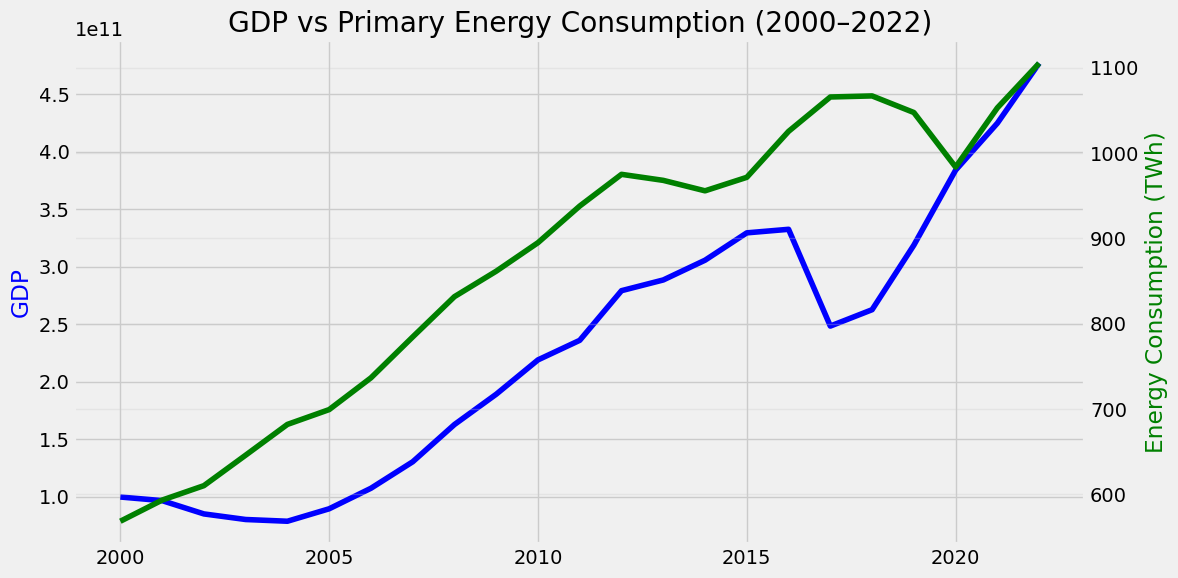

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(egypt['year'], egypt['gdp'], label='GDP (Billion USD)', color='blue')
ax1.set_ylabel('GDP', color='blue')

ax2 = ax1.twinx()
ax2.plot(egypt['year'], egypt['primary_energy_consumption'], label='Primary Energy (TWh)', color='green')
ax2.set_ylabel('Energy Consumption (TWh)', color='green')

plt.title('GDP vs Primary Energy Consumption (2000–2022)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Understanding the relationship between **economic growth** and **energy consumption** is essential for evaluating the sustainability of a country’s development model.

This chart compares **Egypt’s GDP (in USD)** with **total primary energy consumption (in TWh)** from 2000 to 2022. It aims to identify whether the country is becoming more **energy efficient** — that is, generating more economic value per unit of energy.

If GDP increases at a faster rate than energy consumption, it typically indicates **improving energy productivity**.


**Initial Observations:**

- Both GDP and energy consumption have increased over the past two decades, indicating economic expansion and growing energy demand.
- **Between 2000 and 2015**, energy consumption and GDP rose at a relatively similar pace.
- **From 2016 onward**, however, GDP growth **accelerated more sharply** than energy consumption, suggesting a period of **improved energy efficiency**.
- A noticeable **gap opens up between GDP and energy curves post-2018**, indicating that Egypt’s economy may be achieving **higher output with less additional energy input** — a sign of better energy use or structural shifts toward less energy-intensive industries.

This trend is promising from both an environmental and economic perspective.


**Exploratory Insight:**

The divergence between GDP and energy consumption in recent years hints at increasing energy productivity in Egypt. This could result from:
- Energy efficiency policies
- Modernization of industrial and power systems
- A shift toward services and digital sectors

## Linear Regression: Estimating Drivers of Greenhouse Gas Emissions

In [21]:
from sklearn.linear_model import LinearRegression

features = egypt[['fossil_fuel_consumption', 'energy_per_capita', 'electricity_generation']].dropna()
target = egypt.loc[features.index, 'greenhouse_gas_emissions']

model = LinearRegression()
model.fit(features, target)

pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
})

,Feature,Coefficient
0,fossil_fuel_consumption,-0.038604
1,energy_per_capita,0.003152
2,electricity_generation,0.597033


To quantify the impact of different energy-related variables on greenhouse gas (GHG) emissions in Egypt, a simple linear regression model was trained using:

**Features:**
- Fossil fuel consumption (TWh)
- Energy use per capita (kWh/person)
- Electricity generation (TWh)

**Target:**
- Total GHG emissions (in MtCO₂e)

The aim is to explore whether any of these variables appear to be stronger statistical predictors of emissions — and to get a preliminary sense of direction (positive/negative influence).


**Initial Observations:**

- **Electricity generation** has the strongest positive coefficient (**~0.597**), suggesting that increased generation is closely associated with higher GHG emissions — likely due to Egypt’s fossil-based energy mix.
- **Energy per capita** has a small positive coefficient (**~0.003**), implying that higher energy access may contribute to emissions, but not as significantly as overall system-level generation.
- Surprisingly, **fossil fuel consumption** has a slightly **negative coefficient** (**~-0.038**), which may be due to multicollinearity with electricity generation (already capturing fossil-related emissions) or specific years where fossil fuel use plateaued while emissions rose.

> Note: Since this is a simple linear model, these results are exploratory and may not reflect causation.


**Exploratory Insight:**

Electricity generation is the dominant driver of GHG emissions in this model, reinforcing the importance of **decarbonizing the power sector** as a policy priority.
